In [1]:
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelBinarizer, Normalizer
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.783930,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.000000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.000000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.000000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.000000,No,40.0,2.0,Masters,Yes,Yes,7137.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,4273,1/6/2017 14:42:12,United States,Full time,Developer,2.000000,Yes,40.0,0.0,Bachelors (4 years),No,No,4917.000000
4273,4274,12/19/2017 8:59:11,United States,Full time,DBA,4.140793,Yes,NaN,0.0,Bachelors (4 years),No,No,7033.845701
4274,4275,12/24/2018 19:49:32,United States,Full time,Developer,5.000000,No,40.0,0.0,Bachelors (4 years),No,No,7166.000000
4275,4276,12/12/2017 17:12:41,United States,Full time,DBA,4.000000,Yes,40.0,2.0,Bachelors (4 years),Yes,No,9583.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             4277 non-null   int64  
 1   timestamp                      4277 non-null   object 
 2   country                        4277 non-null   object 
 3   employment_status              4277 non-null   object 
 4   job_title                      4277 non-null   object 
 5   job_years                      4277 non-null   float64
 6   is_manager                     4277 non-null   object 
 7   hours_per_week                 4260 non-null   float64
 8   telecommute_days_per_week      4266 non-null   float64
 9   education                      4277 non-null   object 
 10  is_education_computer_related  4261 non-null   object 
 11  certifications                 4277 non-null   object 
 12  salary                         4277 non-null   f

In [5]:
data.isnull().sum()

id                                0
timestamp                         0
country                           0
employment_status                 0
job_title                         0
job_years                         0
is_manager                        0
hours_per_week                   17
telecommute_days_per_week        11
education                         0
is_education_computer_related    16
certifications                    0
salary                            0
dtype: int64

In [6]:
data['hours_per_week'].map(lambda x:isinstance(x,float)).sum()
data['hours_per_week']=data['hours_per_week'].map(lambda x: pd.to_numeric(x,errors='coerce'))

In [7]:
# data.drop(columns=['timestamp'],inplace=True)
if True:
    for col in data.columns:
        if data[col].dtype=='object':
            print(col + ':')
            print(data[col].unique().tolist(),'\n')

timestamp:
['12/11/2018 10:52:26', '1/5/2017 16:57:50', '12/18/2017 8:13:15', '12/27/2018 4:56:52', '12/11/2018 14:07:58', '1/8/2017 12:58:49', '1/9/2017 11:27:40', '12/13/2017 7:41:41', '1/9/2017 19:37:30', '12/12/2017 11:44:16', '1/9/2017 3:52:26', '12/19/2017 12:53:04', '1/9/2017 3:18:08', '12/23/2018 19:17:44', '1/5/2017 7:55:12', '12/21/2017 11:27:50', '12/21/2018 22:09:12', '12/17/2018 6:26:25', '12/13/2017 2:24:40', '1/9/2017 21:12:25', '1/10/2017 12:15:30', '12/11/2018 9:18:12', '12/12/2017 11:45:32', '1/9/2017 11:19:27', '12/22/2018 9:30:21', '1/5/2017 16:06:43', '1/2/2018 14:41:47', '12/26/2017 18:38:58', '12/13/2017 14:47:39', '12/12/2018 7:23:31', '1/5/2017 23:25:57', '12/20/2017 14:17:36', '12/20/2017 10:53:45', '12/24/2018 15:58:16', '12/26/2017 22:21:30', '1/6/2017 16:33:28', '12/13/2017 3:05:00', '12/19/2017 9:51:13', '12/15/2018 6:51:24', '12/12/2017 13:01:38', '12/20/2017 14:04:55', '1/5/2017 8:41:12', '12/27/2017 7:59:33', '1/5/2017 12:03:42', '12/23/2017 17:06:25', 

<AxesSubplot:>

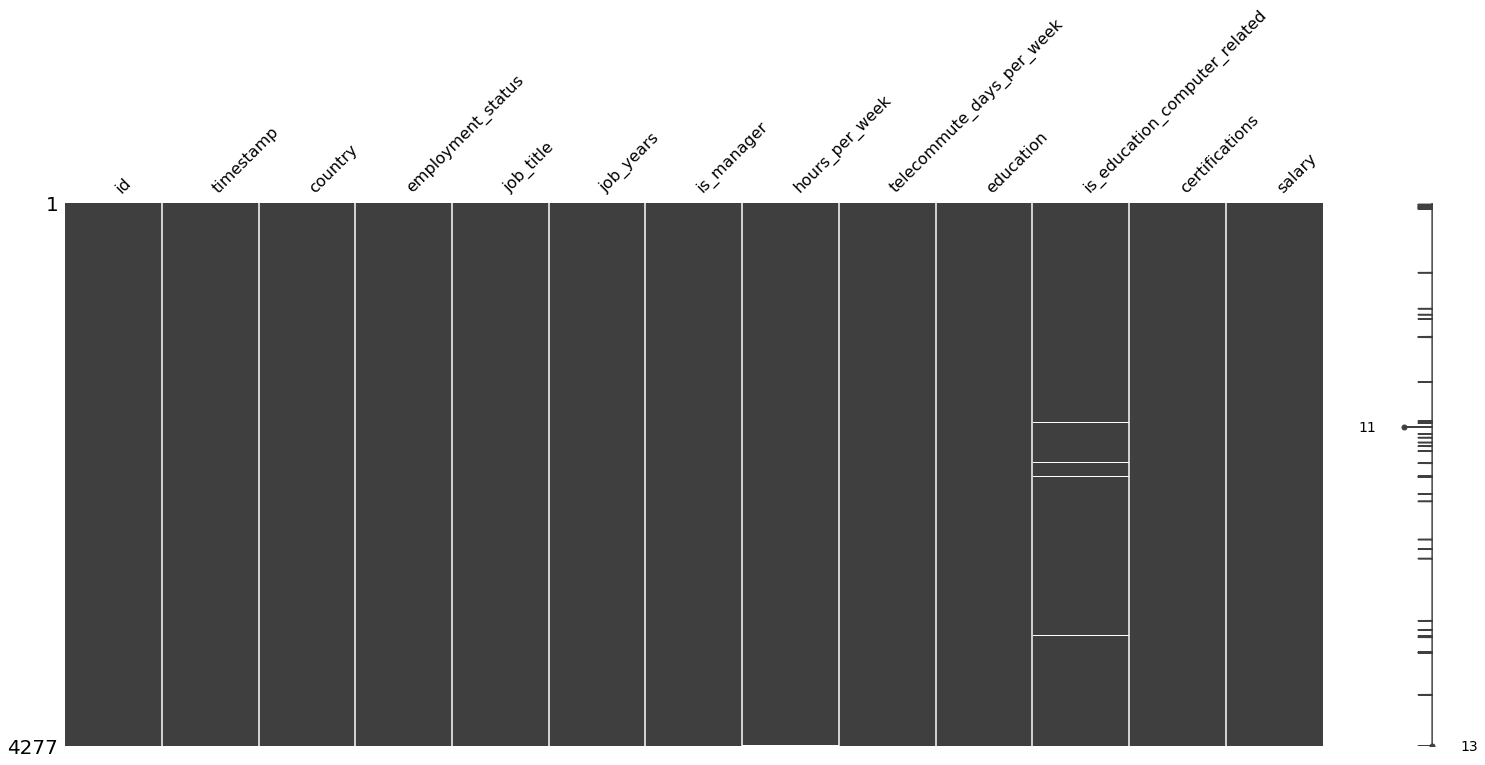

In [8]:
mno.matrix(data)

In [9]:
data['hours_per_week'] = data['hours_per_week'].transform(lambda x: x.fillna(x.median()))
data['telecommute_days_per_week'] = data['telecommute_days_per_week'].transform(lambda x: x.fillna(x.median()))
data['is_education_computer_related'] = data.groupby('job_title')['is_education_computer_related'].transform(lambda x: x.fillna(x.mode()[0]))

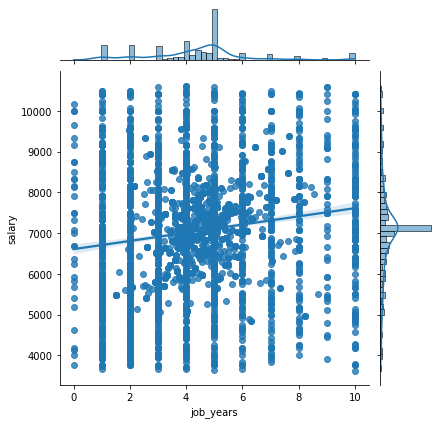

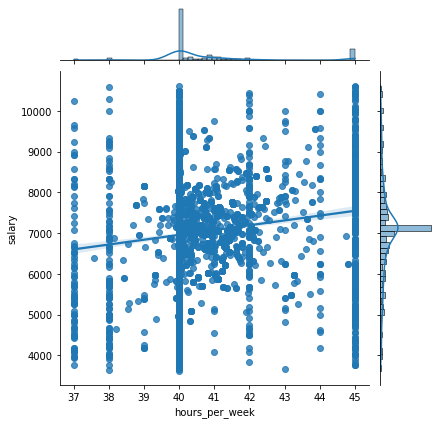

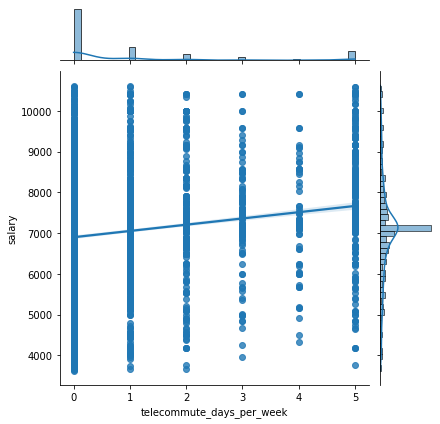

In [10]:
col = ['job_years','hours_per_week','telecommute_days_per_week']
for i,c in enumerate(col):
    sns.jointplot(x=c, y='salary', data=data, kind='reg')
plt.show()

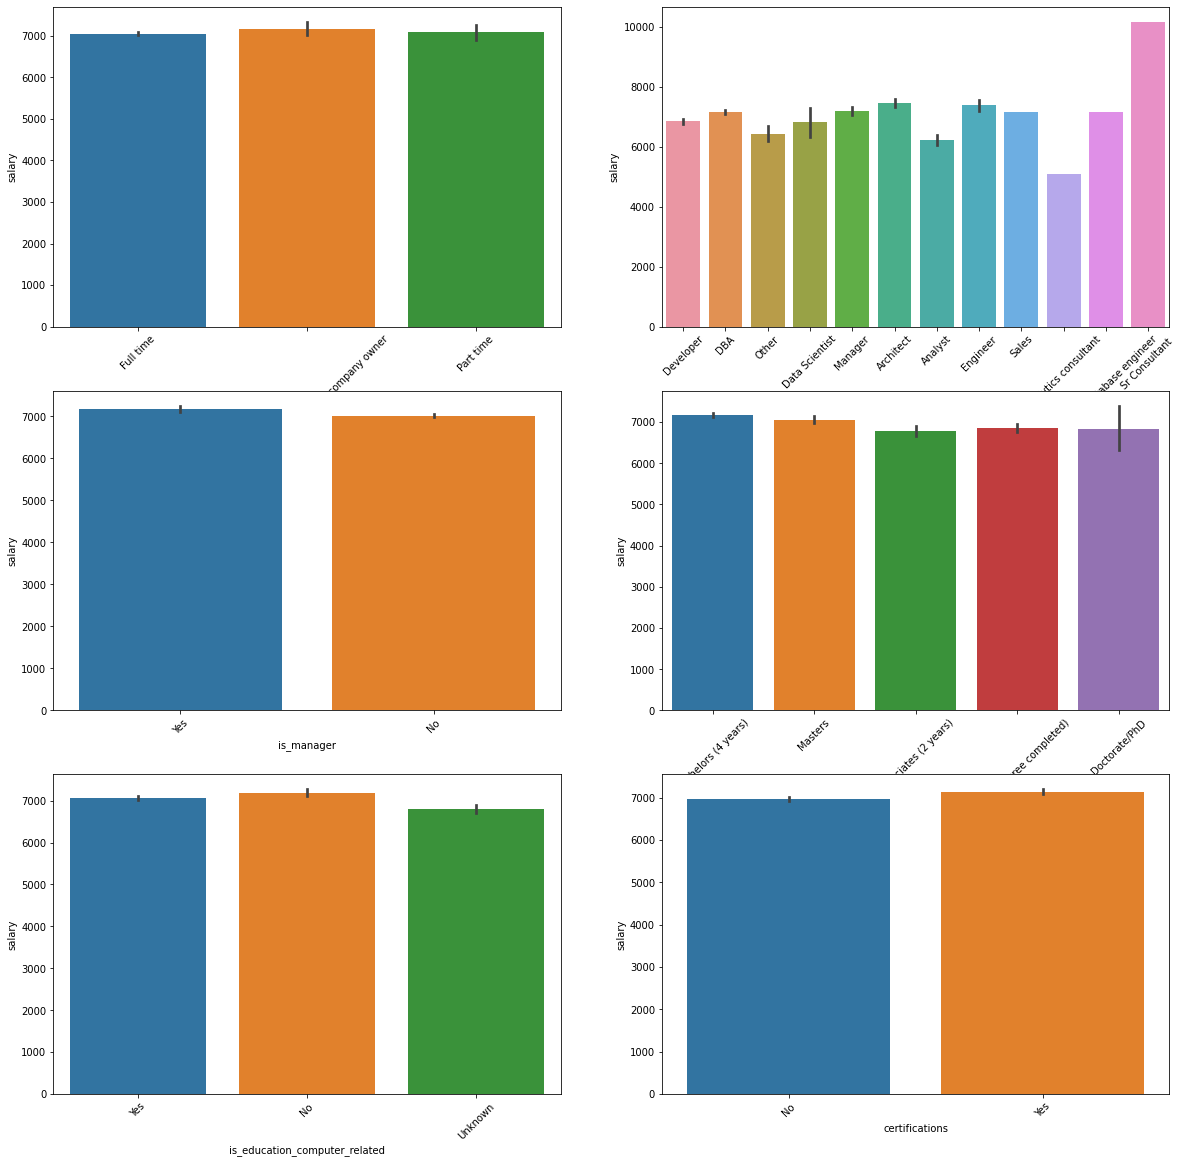

In [11]:
var = ['employment_status','job_title','is_manager','education','is_education_computer_related','certifications']

fig, axs = plt.subplots(3,2,figsize=(20,20))
for i,col in enumerate(var):
    sns.barplot(x=col,y='salary',data=data, ax=axs.ravel()[i])
    axs.ravel()[i].tick_params(axis='x', rotation=45)

<AxesSubplot:>

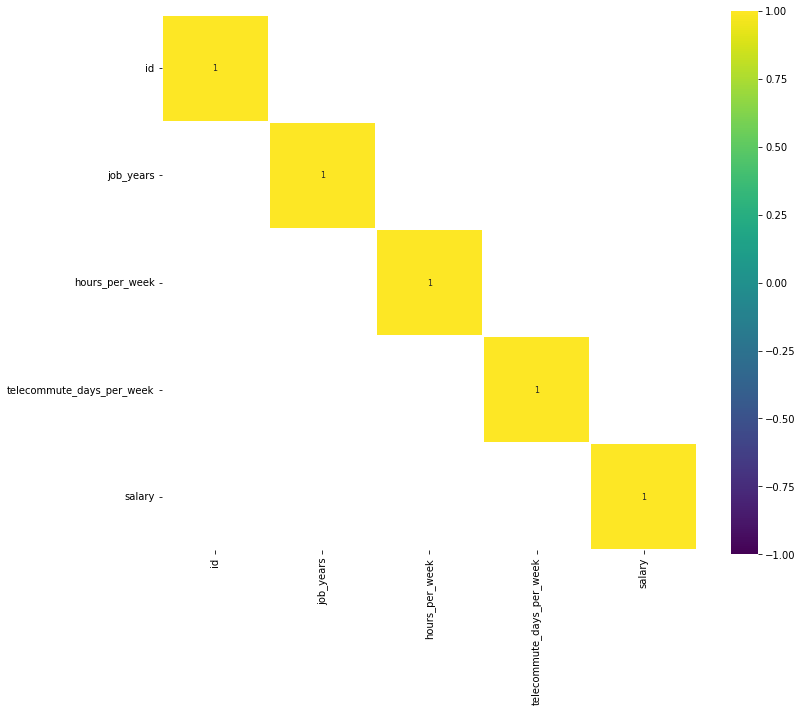

In [12]:
# Correlation heatmap
corr = data.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

In [13]:
# One-hot
one_hot_var = ['country','employment_status','job_title','education','is_education_computer_related']
bin_var = {'is_manager':{'Yes':1,'No':0},'certifications':{'Yes':1,'No':0}}

data = pd.get_dummies(data,columns=one_hot_var)
data.replace(bin_var,inplace=True)

In [14]:
scale = StandardScaler()
col = ['job_years','hours_per_week','telecommute_days_per_week']
for c in col:
    data[c +'_std']= scale.fit_transform(data[c].values.reshape(-1,1))
    data.drop(columns=[c],inplace=True)

In [15]:
data.drop(columns=['id','timestamp'],inplace=True)

In [16]:
X_train,X_valid,y_train,y_valid = train_test_split(data.drop(columns=['salary'],axis=1),data[['salary']],train_size=0.8)

In [17]:
X_valid

,is_manager,certifications,country_Albania,country_Argentina,country_Australia,country_Austria,country_Bahrain,country_Belarus,country_Belgium,country_Bolivia,country_Brazil,country_Bulgaria,country_Canada,country_China,country_Colombia,country_Costa Rica,country_Croatia,country_Czech Republic,country_Denmark,country_Ecuador,country_Estonia,country_Finland,country_France,country_Germany,country_Ghana,country_Greece,country_Guatemala,country_Guernsey,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Ireland,country_Israel,country_Italy,country_Jersey,country_Jordan,country_Kenya,country_Latvia,country_Lithuania,country_Luxembourg,country_Macedonia,country_Malaysia,country_Malta,country_Mexico,country_Moldova,country_Netherlands,country_New Zealand,country_Norway,...,country_Puerto Rico,country_Romania,country_Russia,country_Saudi Arabia,country_Serbia and Montenegro,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Venezuela,country_Vietnam,employment_status_Full time,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analyst,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Associates (2 years),education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_No,is_education_computer_related_Unknown,is_education_computer_related_Yes,job_years_std,hours_per_week_std,telecommute_days_per_week_std
4203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1.097877,0.759370,2.405161
850,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.140588,-0.027512,-0.625739
1271,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,-1.245734,2.365405,0.586621
691,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2.773255,-0.488397,-0.625739
3290,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.230062,-0.432748,-0.625739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,-1.748108,-0.488397,2.405161
1751,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,-0.743361,-1.629917,-0.625739
3796,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [24]:
model = RandomForestRegressor()
clf = model.fit(X_train,y_train)
pred = clf.predict(X_valid)
np.mean(abs(pred-y_valid['salary'].tolist())/y_valid['salary'])*100

9.797732517490292

<AxesSubplot:ylabel='variable'>

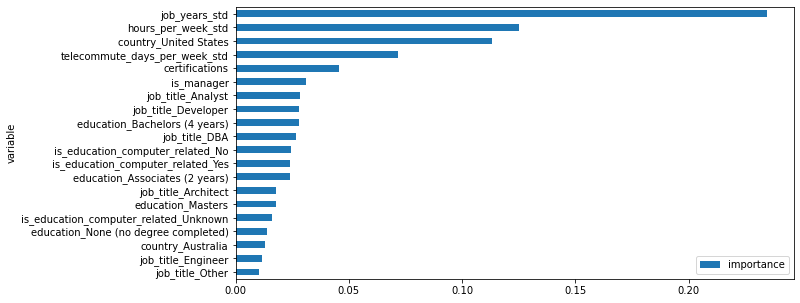

In [47]:
feat_imp = pd.DataFrame([*zip(X_train.columns,model.feature_importances_)])
feat_imp.rename(columns={0:'variable', 1:'importance'}, inplace=True)
feat_imp.sort_values(by='importance',inplace=True)
feat_imp.iloc[-20:].plot.barh(x='variable',y='importance',figsize=(10,5))